# EDA Example

In [2]:
# Load the library with the iris dataset
from sklearn.datasets import load_iris

# Load pandas
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

# Load numpy
import numpy as np

import time

fontsize = 14
ticklabelsize = 14

# Create an object called iris with the iris data
iris = load_iris()

# Create a dataframe with the four feature variables
df = pd.DataFrame(iris.data, columns=iris.feature_names)

print(len(df))

# View the top 5 rows
df.head()

150


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# Add a new column with the species names, this is what we are going to try to predict
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# View the top 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

## Preprocess Data

In [6]:
# Create a list of the feature column's names

# print df.columns
# Index([u'sepal length (cm)', u'sepal width (cm)', u'petal length (cm)',
#        u'petal width (cm)', u'species', u'is_train'],
#       dtype='object')

features = df.columns[:4]

features

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [7]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,target
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


## Data Exploration

In [8]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
sepal length (cm),5.1,4.9,4.7,4.6,5,5.4,4.6,5,4.4,4.9
sepal width (cm),3.5,3,3.2,3.1,3.6,3.9,3.4,3.4,2.9,3.1
petal length (cm),1.4,1.4,1.3,1.5,1.4,1.7,1.4,1.5,1.4,1.5
petal width (cm),0.2,0.2,0.2,0.2,0.2,0.4,0.3,0.2,0.2,0.1
species,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa
target,0,0,0,0,0,0,0,0,0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
species              150 non-null category
target               150 non-null int64
dtypes: category(1), float64(4), int64(1)
memory usage: 6.2 KB


In [10]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [11]:
# if there are objects in dataframe
# df.describe(include = [np.object])

In [12]:
# Check whether there are nulls in the columns
df.isnull().sum(axis=0)

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
target               0
dtype: int64

In [13]:
# # Plot the target column
# # plt.figure(figsize=(12, 8), dpi=80)
# sns.countplot(x='is_ss', data=df_active_riders_filt)
# matplotlib.rcParams.update({'font.size': fontsize})
# matplotlib.rcParams['xtick.labelsize'] = ticklabelsize
# matplotlib.rcParams['ytick.labelsize'] = ticklabelsize

In [14]:
df['sepal length (cm)'].value_counts(dropna=False)

5.0    10
6.3     9
5.1     9
6.7     8
5.7     8
5.5     7
5.8     7
6.4     7
6.0     6
4.9     6
6.1     6
5.4     6
5.6     6
6.5     5
4.8     5
7.7     4
6.9     4
5.2     4
6.2     4
4.6     4
7.2     3
6.8     3
4.4     3
5.9     3
6.6     2
4.7     2
7.6     1
7.4     1
4.3     1
7.9     1
7.3     1
7.0     1
4.5     1
5.3     1
7.1     1
Name: sepal length (cm), dtype: int64

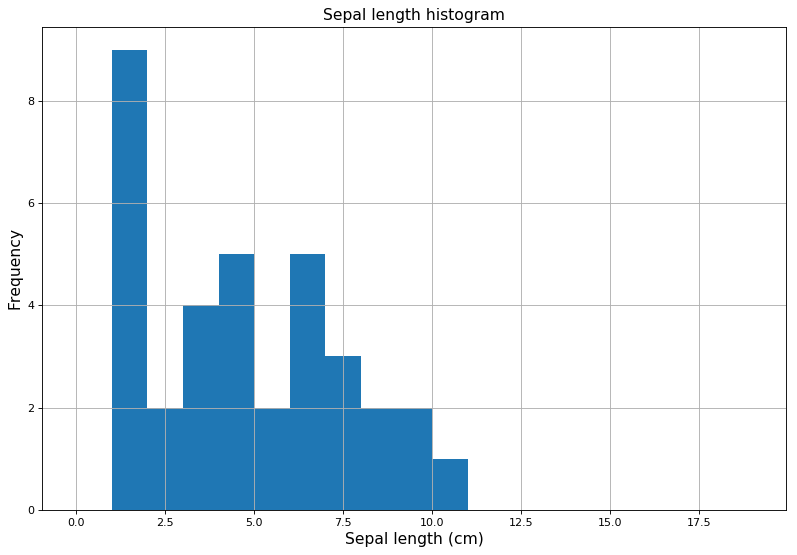

In [15]:
# Plot histogram of sepal length
plt.figure(figsize=(12, 8), dpi=80)
df['sepal length (cm)'].value_counts().hist(bins=range(20))
plt.xlabel('Sepal length (cm)', fontsize=fontsize)
plt.ylabel('Frequency', fontsize=fontsize)
plt.title('Sepal length histogram', fontsize=fontsize)

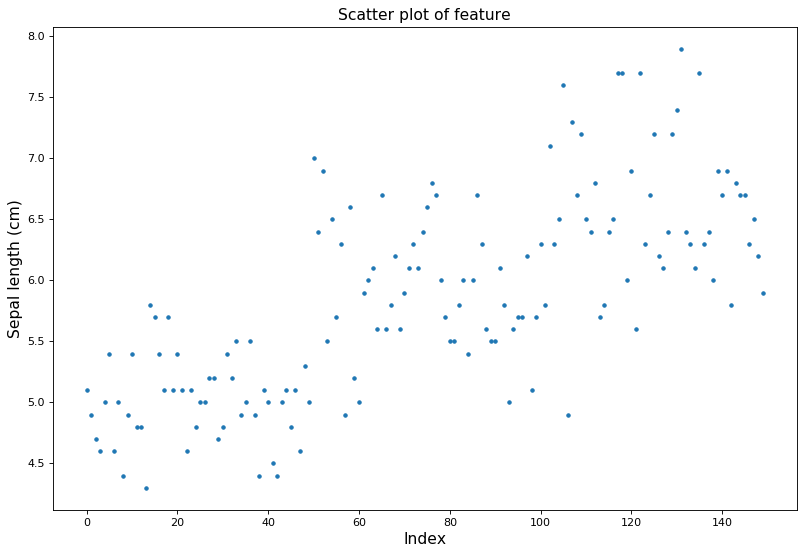

In [16]:
# Plot sepal length versus index
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(df['sepal length (cm)'], '.')
plt.xlabel('Index', fontsize=fontsize)
plt.ylabel('Sepal length (cm)', fontsize=fontsize)
plt.title('Scatter plot of feature', fontsize=fontsize)

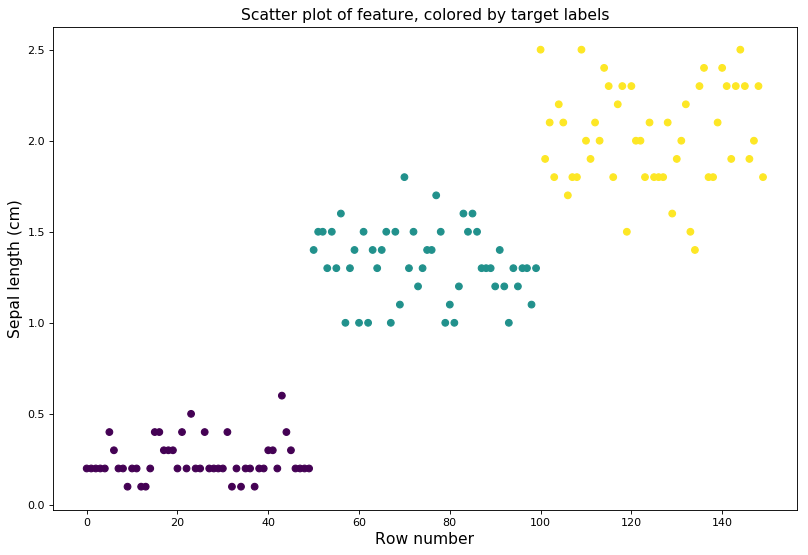

In [17]:
# Plot sepal length versus row number, colored by target labels
plt.figure(figsize=(12, 8), dpi=80)
plt.scatter(range(len(df)), df['petal width (cm)'], c=df['target'])
plt.xlabel('Row number', fontsize=fontsize)
plt.ylabel('Sepal length (cm)', fontsize=fontsize)
plt.title('Scatter plot of feature, colored by target labels', fontsize=fontsize)

In [18]:
# Get a sense of the numbers across the two classes
df.groupby('target').mean().T

target,0,1,2
sepal length (cm),5.006,5.936,6.588
sepal width (cm),3.418,2.770,2.974
petal length (cm),1.464,4.260,5.552
petal width (cm),0.244,1.326,2.026


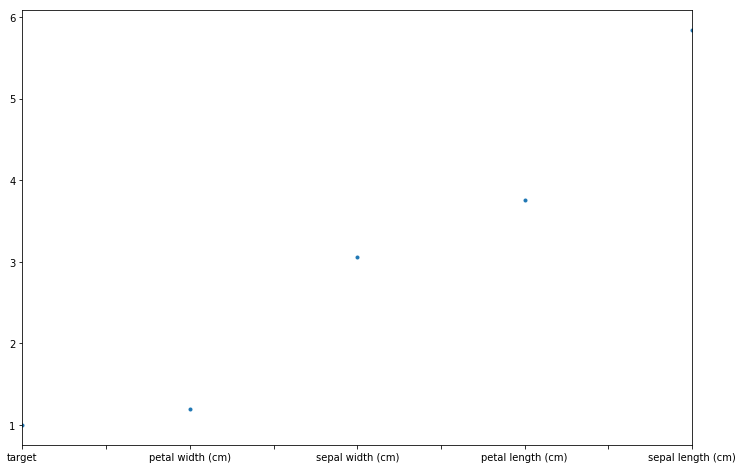

In [19]:
# Plot the mean of each of the features
df.mean().sort_values().plot(style='.', figsize=(12, 8))

In [20]:
# Get a sense of the numbers across the two classes, for categorical features
# df.groupby('avg_ratings_to_driver_84d').mean()

In [21]:
# # Get histogram of feature across the different categorical features
# plt.figure(figsize=(12, 8), dpi=80)
# pd.crosstab(df.avg_ratings_to_driver_84d, df.is_ss).plot(kind='bar')
# plt.xlabel('avg_ratings_to_driver_84d', fontsize=fontsize)
# plt.ylabel('Number of riders', fontsize=fontsize)

# # Get percentage of riders across the different categorical features
# plt.figure(figsize=(12, 8), dpi=80)
# pd.crosstab(df.avg_ratings_to_driver_84d, df.is_ss, normalize='columns').plot(kind='bar')
# plt.xlabel('avg_ratings_to_driver_84d', fontsize=fontsize)
# plt.ylabel('Percentage of riders', fontsize=fontsize)

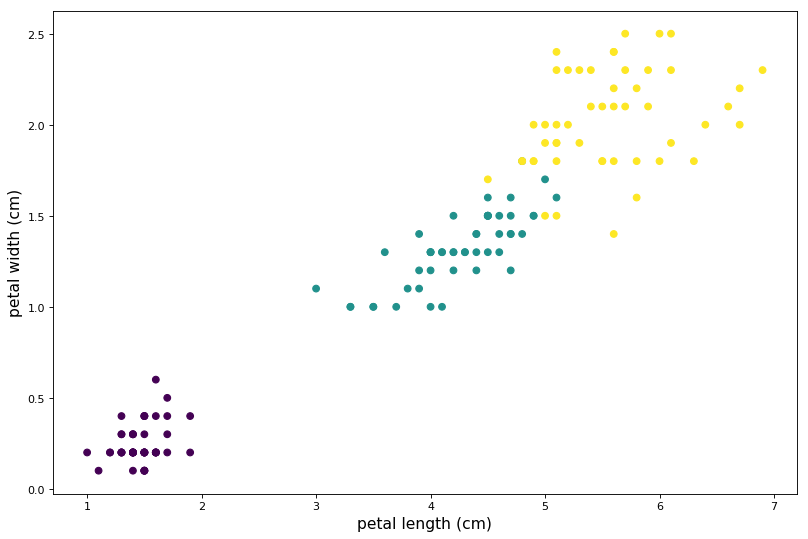

In [22]:
# Plot scatter matrix of 2 features
plt.figure(figsize=(12, 8), dpi=80)
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c=df['target'])
# plt.legend()
plt.xlabel('petal length (cm)', fontsize=fontsize)
plt.ylabel('petal width (cm)', fontsize=fontsize)

/Users/yibin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a19a4a780>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a1a3366a0>]], dtype=object)

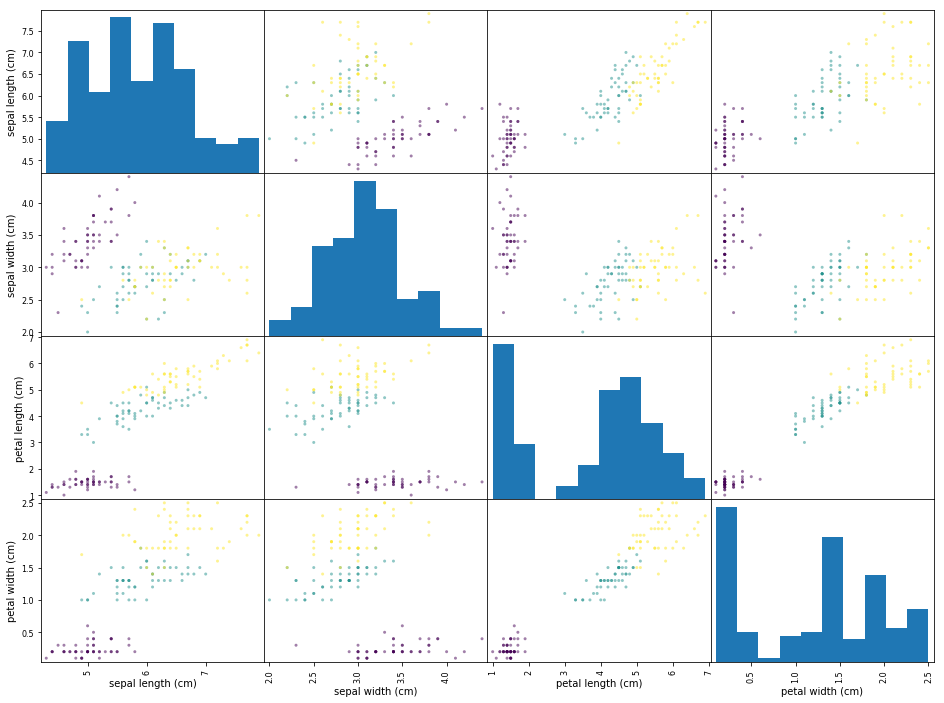

In [27]:
# Plot scatter matrix of the features
attributes = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
pd.scatter_matrix(df[attributes], figsize=(16, 12), c=df['target'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114c03908>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1150bf1d0>]], dtype=object)

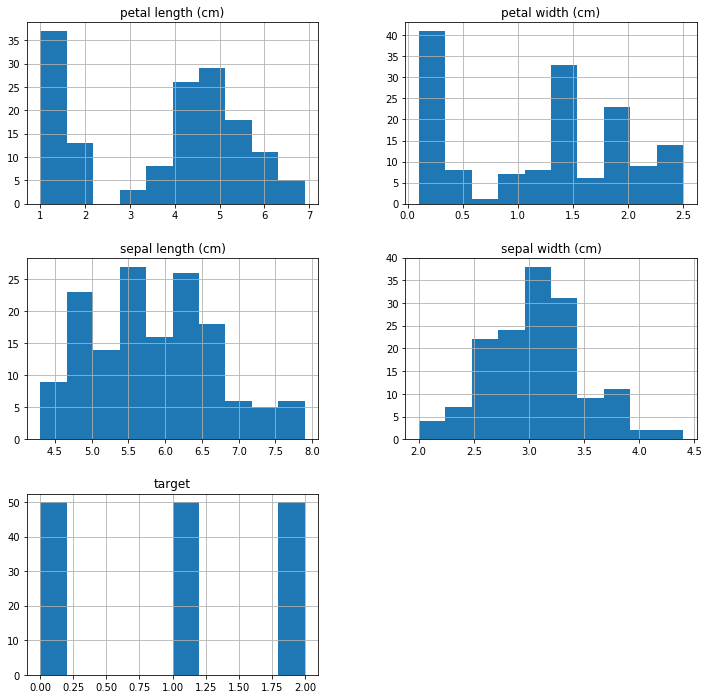

In [24]:
# Plot histogram of the features
df.hist(figsize=(12,12))

In [25]:
# Compute correlation between the features
corr_matrix = df.corr()
corr_matrix["target"].sort_values(ascending=False)

target               1.000000
petal width (cm)     0.956464
petal length (cm)    0.949043
sepal length (cm)    0.782561
sepal width (cm)    -0.419446
Name: target, dtype: float64